In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
rfm = pd.read_csv(r"/Users/priyankamalavade/Desktop/Customer_Segmentation_Sales_Analytics/data/processed/clustered_customers.csv")


In [3]:
#Create Churn Label
# Define churned customers: Recency > 180 days
rfm['Churn'] = np.where(rfm['Recency'] > 180, 1, 0)


In [4]:
#Feature Selection
features = ['Recency', 'Frequency', 'Monetary']
X = rfm[features]
y = rfm['Churn']

In [5]:
#Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [6]:
#Train Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [7]:
#Predictions and Evaluation
y_pred = model.predict(X_test)
print("Classification Report:\n", classification_report(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       685
           1       1.00      1.00      1.00       183

    accuracy                           1.00       868
   macro avg       1.00      1.00      1.00       868
weighted avg       1.00      1.00      1.00       868



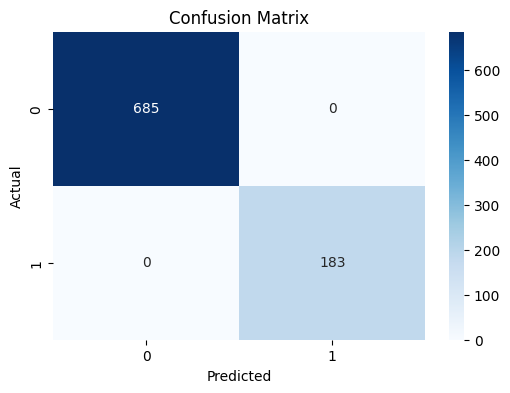

In [8]:
#Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [9]:
import joblib
joblib.dump(model, "/Users/priyankamalavade/Desktop/Customer_Segmentation_Sales_Analytics/model/churn_prediction_model.pkl")
print("Model saved to /Users/priyankamalavade/Desktop/Customer_Segmentation_Sales_Analytics/modelchurn_prediction_model.pkl")


Model saved to /Users/priyankamalavade/Desktop/Customer_Segmentation_Sales_Analytics/modelchurn_prediction_model.pkl
